######AdiPokharna
# **Chit 2 or 13**


*Problem Statement*:

    Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:
    a.	Loading and preprocessing the image data
    b.	Defining the model's architecture
    c.	Training the model
    d.	Estimating the model's performance


## a.	Loading and preprocessing the image data


In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [2]:
# Load the training and testing data from CSV files
train = pd.read_csv("/content/mnist_train.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values
x_train.shape

(60000, 784)

In [4]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32')/255

In [5]:
test = pd.read_csv(r"/content/mnist_test.csv")
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## b.	Defining the model's architecture


In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 64)                5

## c.	Training the model

In [16]:
r = model.fit(x_train, y_train, validation_split=0.2, epochs = 11, batch_size = 64)

Epoch 1/11
750/750 [==============================] - 4s 6ms/step - loss: 0.0175 - accuracy: 0.9938 - val_loss: 0.0527 - val_accuracy: 0.9870
Epoch 2/11
750/750 [==============================] - 6s 8ms/step - loss: 0.0151 - accuracy: 0.9946 - val_loss: 0.0549 - val_accuracy: 0.9872
Epoch 3/11
750/750 [==============================] - 7s 9ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.0597 - val_accuracy: 0.9882
Epoch 4/11
750/750 [==============================] - 7s 9ms/step - loss: 0.0129 - accuracy: 0.9954 - val_loss: 0.0593 - val_accuracy: 0.9887
Epoch 5/11
750/750 [==============================] - 8s 11ms/step - loss: 0.0126 - accuracy: 0.9952 - val_loss: 0.0585 - val_accuracy: 0.9882
Epoch 6/11
750/750 [==============================] - 5s 7ms/step - loss: 0.0112 - accuracy: 0.9961 - val_loss: 0.0551 - val_accuracy: 0.9901
Epoch 7/11
750/750 [==============================] - 4s 5ms/step - loss: 0.0119 - accuracy: 0.9957 - val_loss: 0.0573 - val_accuracy: 0.9887
Epoch

In [17]:
x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values
x_test.shape

(10000, 784)

In [18]:
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32')/255

In [19]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
predictions

array([[1.8861354e-21, 9.3752334e-15, 5.4682252e-14, ..., 1.0000000e+00,
        6.4738773e-22, 2.6028860e-12],
       [9.7132914e-14, 5.6732863e-09, 1.0000000e+00, ..., 5.7462714e-21,
        1.4617780e-16, 3.1078477e-22],
       [6.3699897e-13, 1.0000000e+00, 4.2713020e-13, ..., 2.4993316e-11,
        1.1088338e-09, 7.2481016e-15],
       ...,
       [3.3734709e-23, 8.5063615e-18, 6.1265419e-21, ..., 4.0256247e-17,
        1.5174521e-14, 3.8466802e-14],
       [1.6568006e-19, 4.9655249e-17, 1.0437070e-21, ..., 1.5104705e-17,
        4.2432590e-15, 2.5683984e-16],
       [3.3107116e-14, 2.8623062e-16, 1.2775060e-18, ..., 5.1192636e-23,
        4.9895656e-16, 7.2967387e-21]], dtype=float32)

In [21]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## d.	Estimating the model's performance

In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0467 - accuracy: 0.9890
Test Loss: 0.0467
Test Accuracy: 0.9890


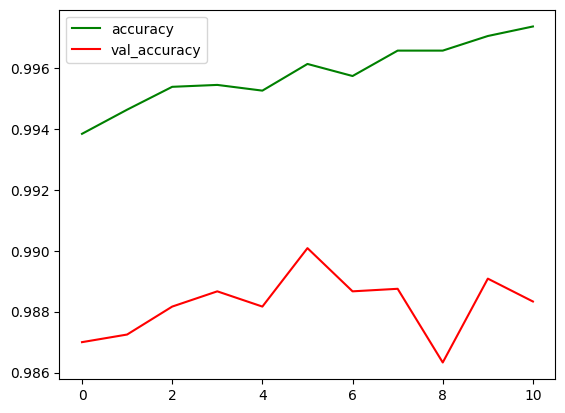

In [23]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()

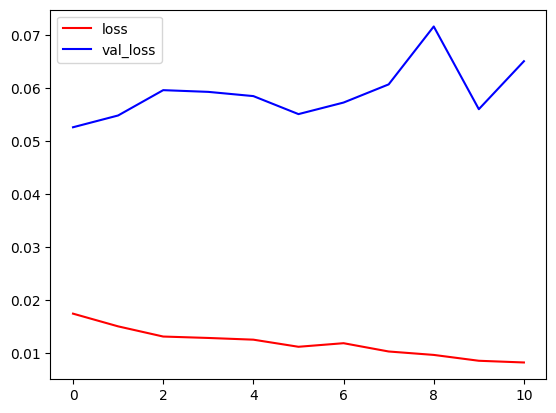

In [24]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()